# Demonstrating ImplicitFiniteDifference class

In this notebook, I will demonstrate the functionality of the `ImplicitFiniteDifference` and `Option` classes defined in `methods.implicitfinitedifference` and `methods.option` respectively. I will do this by working through exercises proposed in:

**Hull, J. C. (2003).** *Options, Futures, and Other Derivatives* (2nd ed.). Prentice-Hall. Chapter 14: Numerical Methods.

In [9]:
from methods.implicitfinitedifference import ImplicitFiniteDifference
from methods.option import Option, Put, Call
from methods.node import Node

import matplotlib.pyplot as plt

## Ex 14.1 American Put on no-dividend asset

In [2]:
# Time to maturity
T = 0.4167
# Number of timesteps
tsteps = 10
# Boundary value of asset price
Smax = 100
# Value steps
vsteps = 20
# Boundary option prices
fmax = 0
fmin = 50
# Current asset price
S = 50
# Option to price
X = 50
option = Put(X, american = True)
# Risk free interest rate and asset volatility (we assume these are constant up
# to maturity). ImplicitFiniteDifference class can be extended so that these
# can be a function of time.
r = 0.10
sigma = 0.40

In [3]:
# Initialize and fit ImplicitFiniteDifference model
american_put_model = ImplicitFiniteDifference(T, tsteps, Smax, vsteps, fmax, fmin)
american_put_model.fit(r=r, sigma=sigma, S=S, option=option)

In [4]:
print(f'The computed option price for the given american put is {american_put_model.f:.5f} dollars.')

The computed option price for the given american put is 4.06732 dollars.


In [8]:
american_put_model.show()

Time (years),0.00 [0],0.04 [1],0.08 [2],0.13 [3],0.17 [4],0.21 [5],0.25 [6],0.29 [7],0.33 [8],0.38 [9],0.42 [10]
Asset Price (dollars),,,,,,,,,,,
100.00 [20],0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95.00 [19],0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
90.00 [18],0.05,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00
85.00 [17],0.09,0.07,0.05,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00
80.00 [16],0.16,0.12,0.09,0.07,0.04,0.03,0.02,0.01,0.00,0.00,0.00
75.00 [15],0.27,0.22,0.17,0.13,0.09,0.06,0.03,0.02,0.01,0.00,0.00
70.00 [14],0.47,0.39,0.32,0.25,0.18,0.13,0.08,0.04,0.02,0.00,0.00
65.00 [13],0.82,0.71,0.60,0.49,0.38,0.28,0.19,0.11,0.05,0.02,0.00
60.00 [12],1.42,1.27,1.11,0.95,0.78,0.62,0.45,0.30,0.16,0.05,0.00


In [7]:
# A logarithmic scale is applied to give a visual representation of varying option prices as a function of time
# and underlying asset price
american_put_model.show(heat=True, scale='log')

Time (years),0.00 [0],0.04 [1],0.08 [2],0.13 [3],0.17 [4],0.21 [5],0.25 [6],0.29 [7],0.33 [8],0.38 [9],0.42 [10]
Asset Price (dollars),,,,,,,,,,,
100.00 [20],0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95.00 [19],0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
90.00 [18],0.05,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00
85.00 [17],0.09,0.07,0.05,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00
80.00 [16],0.16,0.12,0.09,0.07,0.04,0.03,0.02,0.01,0.00,0.00,0.00
75.00 [15],0.27,0.22,0.17,0.13,0.09,0.06,0.03,0.02,0.01,0.00,0.00
70.00 [14],0.47,0.39,0.32,0.25,0.18,0.13,0.08,0.04,0.02,0.00,0.00
65.00 [13],0.82,0.71,0.60,0.49,0.38,0.28,0.19,0.11,0.05,0.02,0.00
60.00 [12],1.42,1.27,1.11,0.95,0.78,0.62,0.45,0.30,0.16,0.05,0.00


# Convergence to solution of Black Scholes differential equation

We can visualize how the model converges to the solution of the Black Scholes equation with the given boundary conditions by increasing the value of tsteps (i.e. bringing the module closer to continuous time computation) and vsteps (underlying asset price closer to continuous spectrum).
The text followed suggest keeping the price steps proportional to the square root of the time steps as they approach zero: this give vsteps proportional to square root of tsteps.

In [31]:
initial_vvalue = 20
initial_tvalue = 10
alpha = initial_vvalue/(initial_tvalue)**(1/2)

vvalues = [20,40,60,80, 100, 120, 140, 160, 180, 200, 220]
tvalues = [int((v/alpha)**2) for v in vvalues]
fvalues = []
for i in range(len(vvalues)):
    model = ImplicitFiniteDifference(T, tvalues[i], Smax, vvalues[i], fmax, fmin)
    model.fit(r=r, sigma=sigma, S=S, option=option)
    fvalues.append(model.f)

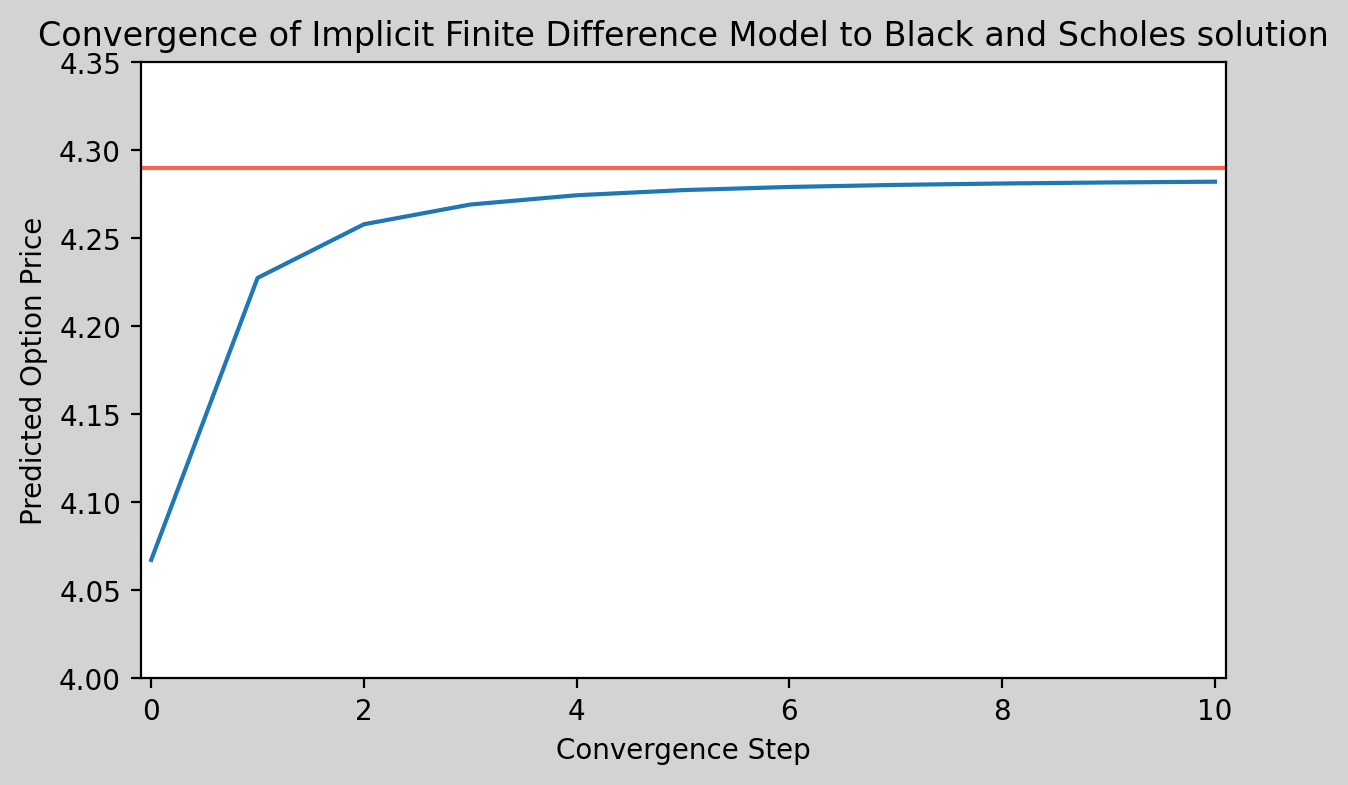

In [39]:
plt.figure(figsize=(7,4), dpi=200, facecolor='lightgray')
plt.plot(range(len(vvalues)), fvalues)
plt.title('Convergence of Implicit Finite Difference Model to Black and Scholes solution')
plt.xlabel('Convergence Step')
plt.ylabel('Predicted Option Price')
plt.ylim((4,4.35))
plt.xlim((-0.1,len(vvalues)-0.9))
plt.axhline(4.29, color='tomato')
plt.show()